**Tutorial de Proyecto de NLP**
- Comprender un dataset nuevo.
- Modelar los datos utilizando un SVM.
- Analizar los resultados y optimizar el modelo.

**🌱 Cómo iniciar este proyecto**
Sigue las siguientes instrucciones:

Crea un nuevo repositorio basado en el proyecto de Machine Learning o haciendo clic aquí.
Abre el repositorio creado recientemente en Codespace usando la extensión del botón de Codespace.
Una vez que el VSCode del Codespace haya terminado de abrirse, comienza tu proyecto siguiendo las instrucciones a continuación.

**🚛 Cómo entregar este proyecto**

Una vez que hayas terminado de resolver el caso práctico, asegúrate de confirmar tus cambios, haz push a tu repositorio y ve a 4Geeks.com para subir el enlace del repositorio.

**📝 Instrucciones**

Sistema de detección de enlaces spam
Queremos implementar un sistema que sea capaz de detectar automáticamente si una página web contiene spam o no basándonos en su URL.

**Paso 1: Carga del conjunto de datos**
El conjunto de datos se puede encontrar en esta carpeta de proyecto bajo el nombre url_spam.csv. Puedes cargarlo en el código directamente desde el siguiente enlace:

https://breathecode.herokuapp.com/asset/internal-link?id=932&path=url_spam.csv
O descargarlo y añadirlo a mano en tu repositorio.

**Paso 2: Preprocesa los enlaces**
Utiliza lo visto en este módulo para transformar los datos para compatibilizarlos con el modelo que queremos entrenar. Segmenta las URLs en partes según sus signos de puntuación, elimina las stopwords, lematiza, etcétera.

Asegúrate de dividir convenientemente el conjunto de datos en train y test como hemos visto en lecciones anteriores.

**Paso 3: Construye un SVM**
Comienza a resolver el problema implementando un SVM con los parámetros por defecto. Entrénalo y analiza sus resultados.

**Paso 4: Optimiza el modelo anterior**
Después de entrenar el SVM, optimiza sus hiperparámetros utilizando un grid search o un random search.

**Paso 5: Guarda el modelo**
Almacena el modelo en la carpeta correspondiente.

### Imports

In [252]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import pickle
from pickle import dump
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
from sklearn.metrics import ConfusionMatrixDisplay
warnings.filterwarnings("ignore")

### PASO 1: Cargamos los datos

In [253]:
df  = pd.read_csv('../data/raw/nlp.csv')
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,False
2995,https://www.youtube.com/watch,True
2996,https://techcrunch.com/2019/07/04/an-optimisti...,False
2997,https://www.technologyreview.com/2019/12/20/13...,False


### PASO 2: 

#### Procesamiento de datos

In [254]:
df.dtypes

url        object
is_spam      bool
dtype: object

In [255]:
df["is_spam"] = df["is_spam"].astype(int)
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
2994,https://www.smartcitiesworld.net/news/news/dee...,0
2995,https://www.youtube.com/watch,1
2996,https://techcrunch.com/2019/07/04/an-optimisti...,0
2997,https://www.technologyreview.com/2019/12/20/13...,0


In [256]:
df.dtypes

url        object
is_spam     int64
dtype: object

In [257]:
df.shape

(2999, 2)

In [258]:
df.duplicated().sum()

np.int64(630)

In [259]:
df.drop_duplicates(inplace=True)

In [260]:
df.isnull().sum()

url        0
is_spam    0
dtype: int64

In [261]:
df.shape

(2369, 2)

#### Procesamiento del texto

In [262]:
def preprocess_url(url):
    url = re.sub(r'https?://', '', str(url))
    url = re.sub(r'[^a-zA-Z0-9]', ' ', url)
    tokens = url.lower().split()
    return tokens

In [263]:
df["url"] = df["url"].apply(preprocess_url)
df

,url,is_spam
0,"[briefingday, us8, list, manage, com, unsubscr...",1
1,"[www, hvper, com]",1
2,"[briefingday, com, m, v4n3i4f3]",1
3,"[briefingday, com, n, 20200618, m, commentform]",0
4,"[briefingday, com, fan]",1
...,...,...
2993,"[www, theverge, com, 2020, 6, 29, 21306889, di...",0
2994,"[www, smartcitiesworld, net, news, news, deepf...",0
2996,"[techcrunch, com, 2019, 07, 04, an, optimistic...",0
2997,"[www, technologyreview, com, 2019, 12, 20, 131...",0


### Lematización

In [264]:
download("wordnet")
lemmatizer = WordNetLemmatizer()

download("stopwords")
stop_words = stopwords.words("english")

def lemmatize_text(words, lemmatizer=lemmatizer):
    # lematiza
    tokens = [lemmatizer.lemmatize(word) for word in words]
    # saca stop words
    tokens = [word for word in tokens if word not in stop_words]
    # se queda con las de largo mayor a
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [265]:
df['tokens'] = df['url'].apply(lemmatize_text)
df

,url,is_spam,tokens
0,"[briefingday, us8, list, manage, com, unsubscr...",1,"[briefingday, list, manage, unsubscribe]"
1,"[www, hvper, com]",1,[hvper]
2,"[briefingday, com, m, v4n3i4f3]",1,"[briefingday, v4n3i4f3]"
3,"[briefingday, com, n, 20200618, m, commentform]",0,"[briefingday, 20200618, commentform]"
4,"[briefingday, com, fan]",1,[briefingday]
...,...,...,...
2993,"[www, theverge, com, 2020, 6, 29, 21306889, di...",0,"[theverge, 2020, 21306889, disney, deepfake, f..."
2994,"[www, smartcitiesworld, net, news, news, deepf...",0,"[smartcitiesworld, news, news, deepfake, techn..."
2996,"[techcrunch, com, 2019, 07, 04, an, optimistic...",0,"[techcrunch, 2019, optimistic, view, deepfakes]"
2997,"[www, technologyreview, com, 2019, 12, 20, 131...",0,"[technologyreview, 2019, 131462, startup, clai..."


#### Nube de palabras

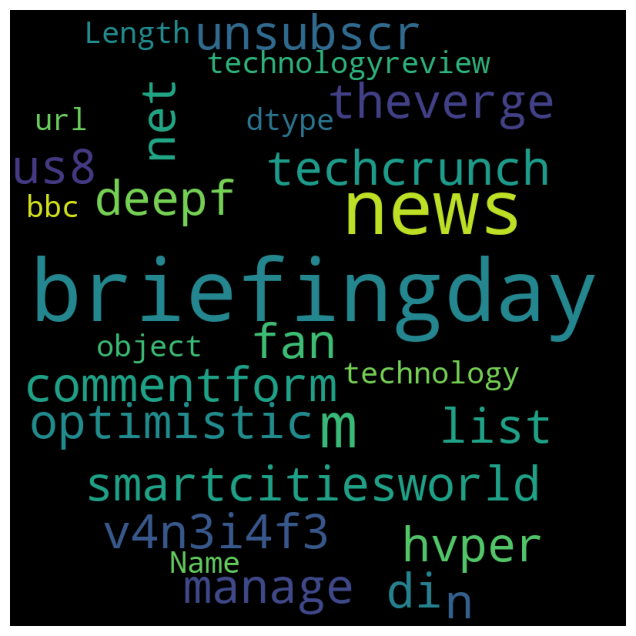

In [266]:
wordcloud = WordCloud(width=800,
                      height=800,
                      background_color="black",
                      max_words=1000,
                      min_font_size=20,
                      random_state=18).generate(str(df["url"]))

fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Vectorizamos

In [267]:
tokens_list = [" ".join(tokens) for tokens in df['tokens']]

vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)
X = vectorizer.fit_transform(tokens_list)
y = df['is_spam'].values

X[:5]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (5, 549)>

In [268]:
X.shape, y.shape

((2369, 549), (2369,))

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)

In [270]:
model = SVC(kernel="linear",
            random_state=18)
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [271]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [272]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [273]:
# Métricas
metrics = {"Accuracy Train": accuracy_score(y_train, y_pred_train),
           "Accuracy Test": accuracy_score(y_test, y_pred_test)}

metrics

{'Accuracy Train': 0.9525065963060686, 'Accuracy Test': 0.9219409282700421}

### Hiperparametrizacion

#### GridSearchCV

In [274]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ...................

,estimator,SVC(kernel='l...ndom_state=18)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [275]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [276]:
grid_search.best_score_

np.float64(0.9419525065963061)

In [277]:
best_model = grid_search.best_estimator_
best_model

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [278]:
best_y_pred_test = best_model.predict(X_test)
best_y_pred_train = best_model.predict(X_train)

In [279]:
metrics = {"Accuracy Train: ": accuracy_score( best_y_pred_train, y_train),
           "Accuracy Test ": accuracy_score(best_y_pred_test, y_test)}

metrics

{'Accuracy Train: ': 0.9725593667546174, 'Accuracy Test ': 0.930379746835443}

#### RandomSearchCV

In [280]:
param_dist = {'C': (0.1, 100),
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=18,
    n_jobs=-1,
    verbose=2)

random_search.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.4s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ...................C=0.1, gamma=auto, ke

,estimator,SVC(random_state=18)
,param_distributions,"{'C': (0.1, ...), 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,18
,error_score,nan


In [281]:

random_search.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 100}

In [282]:
random_search.best_score_

np.float64(0.9419525065963061)

In [283]:
best_model = random_search.best_estimator_
best_model

,C,100
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [284]:
best_y_pred_test = best_model.predict(X_test)
best_y_pred_train = best_model.predict(X_train)

In [285]:
metrics = {"Accuracy Train: ": accuracy_score( y_train, best_y_pred_train),
           "Accuracy Test ": accuracy_score(y_test, best_y_pred_test )}

metrics

{'Accuracy Train: ': 0.9725593667546174, 'Accuracy Test ': 0.930379746835443}

#### Mejores resultados

In [292]:
y_pred = best_model.predict(X_test)

In [296]:

df_report.loc['accuracy', 'precision'] = accuracy_score(y_test, y_pred) # type: ignore
df_report # type: ignore

,precision,recall,f1-score,support
0,0.939462,0.985882,0.962113,425.00000
1,0.785714,0.448980,0.571429,49.00000
accuracy,0.930380,0.930380,0.930380,0.93038
macro avg,0.862588,0.717431,0.766771,474.00000
weighted avg,0.923568,0.930380,0.921725,474.00000


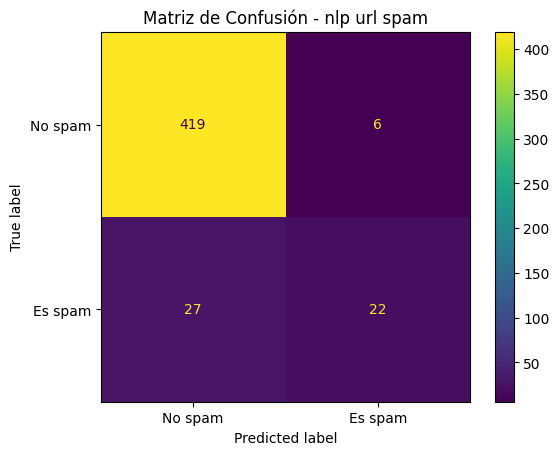

In [302]:
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, 
                                       display_labels=['No spam', 'Es spam'])
plt.title('Matriz de Confusión - nlp url spam')
plt.show()

### Paso 4: Guardamos el modelo

In [ ]:
with open('../models/12-nlp-url-spam-best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)